<a href="https://www.kaggle.com/code/hajarhanifah/clustering-sektor-industri-hajar-hanifah?scriptVersionId=99798095" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/q4-mesin-dan-komponen-industri-2021/Financial Data and Ratio Q4 2021 Aneka Industri sub mesin dan komponen industri.csv
/kaggle/input/emiten-sub-sektor-mesin-dan-komponen-industri/Daftar emiten aneka industri sub sektor mesin dan komponen industri.csv


***
# Clustering Emiten Aneka Industri sub sektor Mesin dan Komponen Industri  Q4 2021 -  HAJAR HANIFAH 
***

Tujuan penelitian ini adalah melakukan clustering terhadap data seluruh emiten saham di sektor aneka industri untuk sub sektor Mesin dan Komponen Industri Q4 2021. 
Adapun beberapa step yang akan dilakukan adalah 
1. load data
2. Data cleansing
3. Display scatter plot
4. Clustering Data
5. Menentukan Outliers
6. Mencari K-Means
7. Mengukur Elbow Point 
8. Menampilkan Result data clustering

***
# 1. Import Libraries
***

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline
from scipy import stats

***
# 2. Exploratory Data Analysis
***


# 2.1 Data Understanding

Data yang diambil merupakan data statictical financial ratio Q4 2021 untuk seluruh emiten di sektor Industri.

Data di dapatkan dari [IDX - Laporan Statistic Financial Data Ratio](https://www.idx.co.id/data-pasar/laporan-statistik/digital-statistic-beta/financial-data-ratio?q=eyJ5ZWFyIjoiMjAyMSIsIm1vbnRoIjpudWxsLCJxdWFydGVyIjo0LCJ0eXBlIjoieWVhcmx5In0=)


# 2.2 Understanding The Table

* **Emiten :** Pihak yang melakukan penawaran umum, yaitu penawaran efek yang dilakukan oleh emiten untuk menjual efek kepada masyarakat berdasarkan tata cara yang diatur dalam peraturan undang-undang yang berlaku. 
* **Sales Growth :** Kenaikan jumlah penjualan dari tahun ke tahun atau dari waktu ke waktu.
* **ROA (Return of Asset) :** Indikator untuk menunjukkan seberapa untuk sebuah perusahaan dibandingkan dengan total asetnya. 
* **DER (Debt to Equity Ratio) :** Rasio hutang terhadap ekuitas atau rasio keuangan yang membandingkan jumlah hutang dengan ekuitas

Keterangan rasio yang akan digunakan : 
- **DER =** Total Uang / Total Ekuitas
- **Return on Asset =** Laba setelah pajak / Total Asset 
- **Sales Growth =** (penjualan periode 2021 - penjualan periode 2020)/ penjualan periode 2020

# 2.3 Load Data

In [3]:
df0 = pd.read_csv('../input/q4-mesin-dan-komponen-industri-2021/Financial Data and Ratio Q4 2021 Aneka Industri sub mesin dan komponen industri.csv')
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   emiten        29 non-null     object 
 1   sales 2021    29 non-null     object 
 2   sales 2020    29 non-null     object 
 3   sales growth  29 non-null     float64
 4   DER           29 non-null     float64
 5   ROA           29 non-null     float64
dtypes: float64(3), object(3)
memory usage: 1.5+ KB


In [4]:
df0.describe()

,sales growth,DER,ROA
count,29.000000,29.000000,29.000000
mean,0.304483,1.897586,0.025517
std,0.431456,3.366741,0.103909
min,-0.280000,-2.860000,-0.320000
25%,0.030000,0.510000,-0.020000
50%,0.220000,0.880000,0.020000
75%,0.410000,1.910000,0.060000
max,1.440000,16.330000,0.310000


**Menambahkan Kolom "Category"**

In [5]:
df0["category"] = pd.NaT

**Memeriksa nilai Null**

In [6]:
print(df0.isna().sum())

emiten           0
sales 2021       0
sales 2020       0
sales growth     0
DER              0
ROA              0
category        29
dtype: int64


**Mengganti Null dengan 0**

In [7]:
df0.fillna(0, inplace=True)

In [8]:
display(df0)

,emiten,sales 2021,sales 2020,sales growth,DER,ROA,category
0,AMFG,"3,482.42","2,628.14",0.33,1.32,0.06,0
1,AMIN,126.41,89.53,0.41,1.14,-0.05,0
2,APII,196.58,191.18,0.03,0.49,0.05,0
3,ARKA,49.52,40.49,0.22,3.97,-0.02,0
4,ARNA,"1,885.43","1,612.59",0.17,0.51,0.21,0
5,CAKK,192.80,148.83,0.30,0.88,0.03,0
6,CCSI,309.02,172.84,0.79,0.31,0.11,0
7,CTTH,63.36,76.58,-0.17,2.28,-0.05,0
8,HEXA,"2,558.36","1,521.05",0.68,1.38,0.12,0
9,IKBI,"1,607.30",959.71,0.67,0.67,0.01,0


# 2.4 Data Cleansing

In [9]:
df0.drop(["sales 2021","sales 2020"], axis=1, inplace=True)

# 2. Scatter Plot

<Figure size 1440x1440 with 0 Axes>

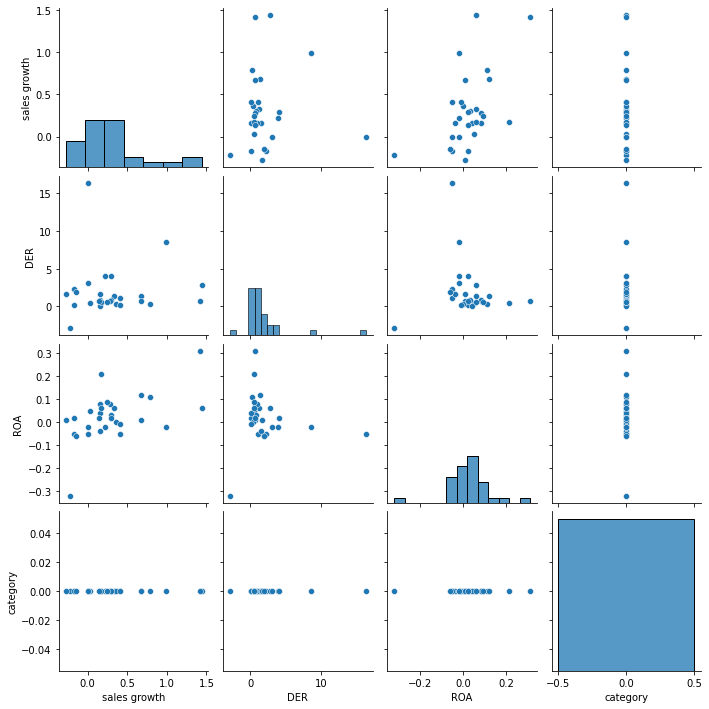

In [10]:
plt.figure(figsize=(20, 20))
sns.pairplot(df0, vars = df0.columns[1:6]);

***
# 3. CLUSTERING
***


# 3.1 Load Data

**Buat Dataframe Baru**

In [11]:
df1 = df0[['sales growth', 'DER','ROA','category']]
df1.describe()

,sales growth,DER,ROA,category
count,29.000000,29.000000,29.000000,29.0
mean,0.304483,1.897586,0.025517,0.0
std,0.431456,3.366741,0.103909,0.0
min,-0.280000,-2.860000,-0.320000,0.0
25%,0.030000,0.510000,-0.020000,0.0
50%,0.220000,0.880000,0.020000,0.0
75%,0.410000,1.910000,0.060000,0.0
max,1.440000,16.330000,0.310000,0.0


In [12]:
display(df1)

,sales growth,DER,ROA,category
0,0.33,1.32,0.06,0
1,0.41,1.14,-0.05,0
2,0.03,0.49,0.05,0
3,0.22,3.97,-0.02,0
4,0.17,0.51,0.21,0
5,0.30,0.88,0.03,0
6,0.79,0.31,0.11,0
7,-0.17,2.28,-0.05,0
8,0.68,1.38,0.12,0
9,0.67,0.67,0.01,0


# 3.2 Scatter Plot

<AxesSubplot:xlabel='emiten', ylabel='sales growth'>

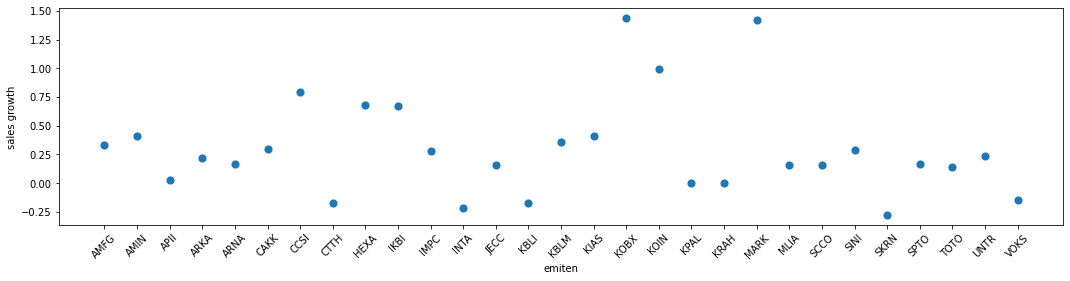

In [13]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='emiten', y='sales growth', 
                data=df0, s=80)

<AxesSubplot:xlabel='emiten', ylabel='DER'>

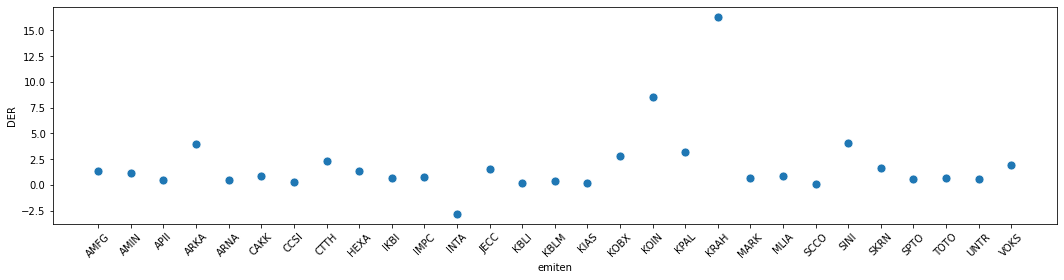

In [14]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='emiten', y='DER', 
                data=df0, s=80)

<AxesSubplot:xlabel='emiten', ylabel='ROA'>

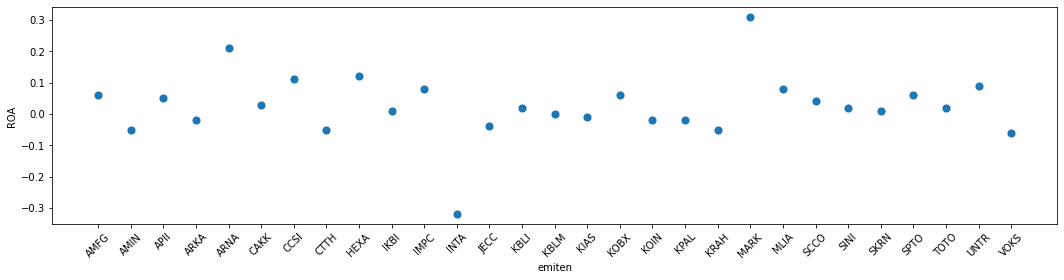

In [15]:
plt.figure(figsize=(18, 4))
plt.xticks(rotation=45)
sns.scatterplot(x='emiten', y='ROA', 
                data=df0, s=80)

# 3.3 Outlier

In [16]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df1)}')

filtered_entries = np.array([False] * len(df1))
for col in ['sales growth']:
    zscore = abs(stats.zscore(df1[col]))
    filtered_entries = (zscore < 3) | filtered_entries
    
df1 = df1[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df1)}')

Jumlah baris sebelum memfilter outlier: 29
Jumlah baris setelah memfilter outlier: 29


hasil diatas menunjukkan bahwa tidak ada outler (outlier = 0)

In [17]:
df0.describe()

,sales growth,DER,ROA,category
count,29.000000,29.000000,29.000000,29.0
mean,0.304483,1.897586,0.025517,0.0
std,0.431456,3.366741,0.103909,0.0
min,-0.280000,-2.860000,-0.320000,0.0
25%,0.030000,0.510000,-0.020000,0.0
50%,0.220000,0.880000,0.020000,0.0
75%,0.410000,1.910000,0.060000,0.0
max,1.440000,16.330000,0.310000,0.0


# 3.4 Standarisasi Fitur

In [18]:

feats = ['sales growth', 'DER','ROA']
X = df1[feats].values
y = df1['category'].values

from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler().fit_transform(X)
new_dataframe = pd.DataFrame(data = standardscaler, columns = feats)
new_dataframe.describe()

,sales growth,DER,ROA
count,2.900000e+01,2.900000e+01,2.900000e+01
mean,-2.220446e-16,7.058530e-18,-3.445520e-17
std,1.017700e+00,1.017700e+00,1.017700e+00
min,-1.378654e+00,-1.438126e+00,-3.384054e+00
25%,-6.474387e-01,-4.194403e-01,-4.458035e-01
50%,-1.992745e-01,-3.075965e-01,-5.403679e-02
75%,2.488897e-01,3.752448e-03,3.377299e-01
max,2.678412e+00,4.362638e+00,2.786272e+00


In [19]:
new_dataframe

,sales growth,DER,ROA
0,0.060189,-0.174593,0.337730
1,0.248890,-0.229004,-0.739629
2,-0.647439,-0.425486,0.239788
3,-0.199274,0.626450,-0.445804
4,-0.317212,-0.419440,1.806855
5,-0.010574,-0.307597,0.043905
6,1.145218,-0.479896,0.827438
7,-1.119190,0.115596,-0.739629
8,0.885755,-0.156456,0.925380
9,0.862167,-0.371075,-0.151978


# 3.5 K-Means

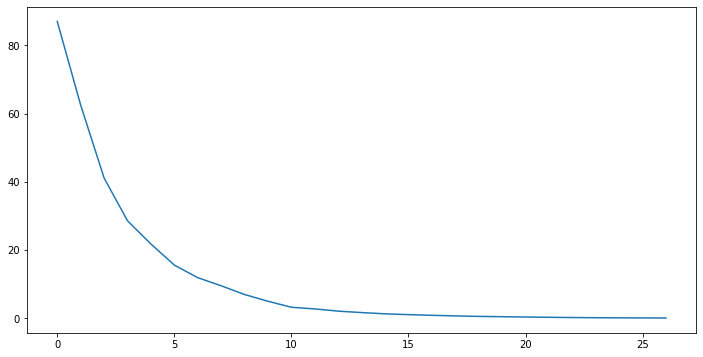

In [20]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1, 28):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(new_dataframe.values)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(inertia) #Elbow Method

Ternyata clustering paling optimal di 5 cluster (n_cluster = 5)

# 3.6 Pilih Jumlah Cluster

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=12, random_state=0)
kmeans.fit(new_dataframe.values)

KMeans(n_clusters=5, n_init=12, random_state=0)

In [22]:
new_dataframe['target'] = y
new_dataframe['fit'] = kmeans.labels_

# 3.7 Plot Cluster

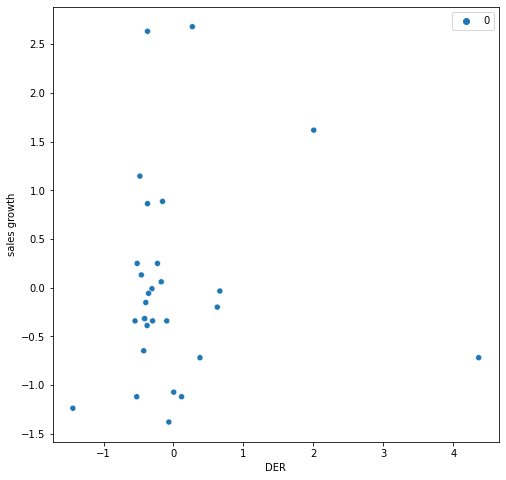

In [23]:
plt.rcParams["figure.figsize"] = (8, 8)
sns.scatterplot(x='DER', y='sales growth', hue=new_dataframe.target.to_list(), data=new_dataframe);

In [24]:
new_dataframe.head(6)

,sales growth,DER,ROA,target,fit
0,0.060189,-0.174593,0.337730,0,2
1,0.248890,-0.229004,-0.739629,0,2
2,-0.647439,-0.425486,0.239788,0,2
3,-0.199274,0.626450,-0.445804,0,2
4,-0.317212,-0.419440,1.806855,0,1
5,-0.010574,-0.307597,0.043905,0,2


Assign fit ke kolom category untuk membuat color indicator

In [25]:
new_dataframe.insert(0,"category",np.nan,True)
new_dataframe.loc[new_dataframe['fit'] == 0, 'category'] = 2
new_dataframe.loc[new_dataframe['fit'] == 1, 'category'] = 4
new_dataframe.loc[new_dataframe['fit'] == 2, 'category'] = 1
new_dataframe.loc[new_dataframe['fit'] == 3, 'category'] = 0
new_dataframe.loc[new_dataframe['fit'] == 4, 'category'] = 3
new_dataframe['category'] = new_dataframe['category'].astype(int)
new_dataframe.head(6)

,category,sales growth,DER,ROA,target,fit
0,1,0.060189,-0.174593,0.337730,0,2
1,1,0.248890,-0.229004,-0.739629,0,2
2,1,-0.647439,-0.425486,0.239788,0,2
3,1,-0.199274,0.626450,-0.445804,0,2
4,4,-0.317212,-0.419440,1.806855,0,1
5,1,-0.010574,-0.307597,0.043905,0,2


Adjust column name to (St.) = Standardized

In [26]:
new_dataframe.drop(["fit","target"], axis=1, inplace=True)
new_dataframe.columns = ['category', 'sales growth (St.)','DER (St.)','ROA (St.)']
new_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   category            29 non-null     int64  
 1   sales growth (St.)  29 non-null     float64
 2   DER (St.)           29 non-null     float64
 3   ROA (St.)           29 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.0 KB


# 3.7.1 3D Scatter Plot

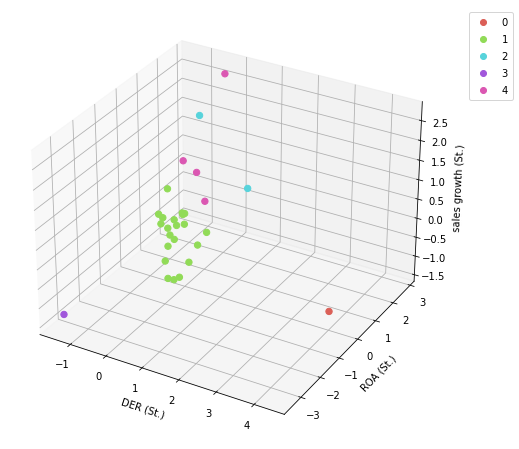

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')


x = new_dataframe['DER (St.)']
y = new_dataframe['ROA (St.)']
z = new_dataframe['sales growth (St.)']

ax.set_xlabel("DER (St.)")
ax.set_ylabel("ROA (St.)")
ax.set_zlabel("sales growth (St.)")

cmap = ListedColormap(sns.color_palette("hls", 8).as_hex())

sc = ax.scatter(x, y, z, s=40, c=new_dataframe['category'], marker='o', cmap=cmap, alpha=1)
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

# 3.7.2 X vs Z View

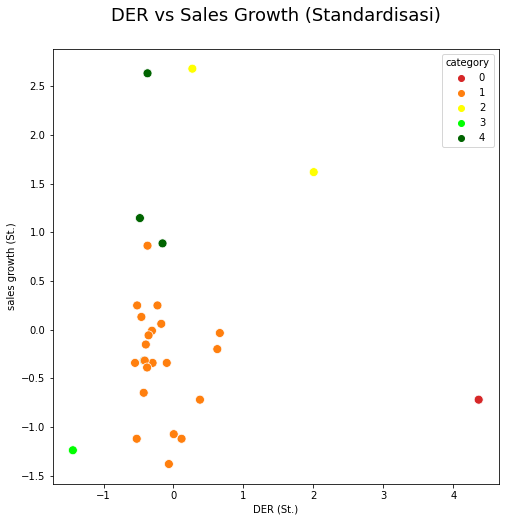

In [28]:
# color palette as dictionary
palette = {0:"tab:red",
           1:"tab:orange", 
           2:"yellow",
           3:"lime",
           4:"darkgreen"}

sns.scatterplot(x='DER (St.)', y='sales growth (St.)', 
                hue='category', data=new_dataframe, s=80,
                palette=palette)
plt.title("DER vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

# 3.7.3 Y vs Z View

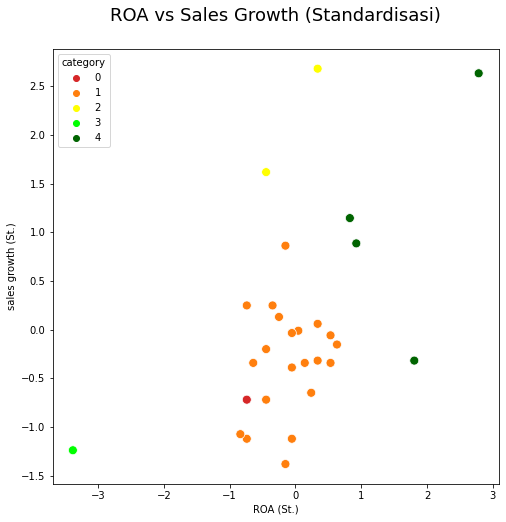

In [29]:
sns.scatterplot(x='ROA (St.)', y='sales growth (St.)', 
                hue='category', data=new_dataframe, s=80,
                palette=palette)
plt.title("ROA vs Sales Growth (Standardisasi)", fontsize=18, y=1.05)
plt.show()

# 3.7.4 X vs Y View

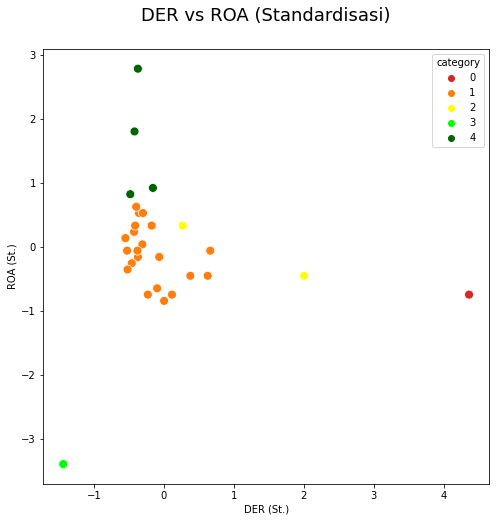

In [30]:
sns.scatterplot(x='DER (St.)', y='ROA (St.)', 
                hue='category', data=new_dataframe, s=80,
                palette=palette)
plt.title("DER vs ROA (Standardisasi)", fontsize=18, y=1.05)
plt.show()

***
# 4. Export Result
***

In [31]:
display(df0)

,emiten,sales growth,DER,ROA,category
0,AMFG,0.33,1.32,0.06,0
1,AMIN,0.41,1.14,-0.05,0
2,APII,0.03,0.49,0.05,0
3,ARKA,0.22,3.97,-0.02,0
4,ARNA,0.17,0.51,0.21,0
5,CAKK,0.30,0.88,0.03,0
6,CCSI,0.79,0.31,0.11,0
7,CTTH,-0.17,2.28,-0.05,0
8,HEXA,0.68,1.38,0.12,0
9,IKBI,0.67,0.67,0.01,0


Adjust Initial Data (data):
Delete outlier YELO and other column other than emiten, DER, ROA,sales growth.

# 6.1 Pengolahan Data

**Drop kolom yang tidak digunakan pada dataframe awal (df0)**

In [32]:
df0.drop(['category'], axis=1, inplace=True)
df0.drop(['emiten'], axis=1, inplace=True)

satukan data list emiten **dftemp**, dengan dataframe baru **new_dataframe** dan dataframe awal **df0**

In [33]:
dftemp = pd.read_csv('../input/emiten-sub-sektor-mesin-dan-komponen-industri/Daftar emiten aneka industri sub sektor mesin dan komponen industri.csv')
df = pd.concat([dftemp, new_dataframe, df0], axis=1)
df.head(5)

,emiten,stock name,category,sales growth (St.),DER (St.),ROA (St.),sales growth,DER,ROA
0,AMFG,Asahimas Flat Glass Tbk,1,0.060189,-0.174593,0.337730,0.33,1.32,0.06
1,AMIN,PT Ateliers Mecaniques D Indonesie Tbk.,1,0.248890,-0.229004,-0.739629,0.41,1.14,-0.05
2,APII,PT Arita Prima Indonesia Tbk.,1,-0.647439,-0.425486,0.239788,0.03,0.49,0.05
3,ARKA,PT Arkha Jayanti Persada Tbk.,1,-0.199274,0.626450,-0.445804,0.22,3.97,-0.02
4,ARNA,Arwana Citramulia Tbk,4,-0.317212,-0.419440,1.806855,0.17,0.51,0.21


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   emiten              29 non-null     object 
 1   stock name          29 non-null     object 
 2   category            29 non-null     int64  
 3   sales growth (St.)  29 non-null     float64
 4   DER (St.)           29 non-null     float64
 5   ROA (St.)           29 non-null     float64
 6   sales growth        29 non-null     float64
 7   DER                 29 non-null     float64
 8   ROA                 29 non-null     float64
dtypes: float64(6), int64(1), object(2)
memory usage: 2.2+ KB


# 4.2 Simpan Data

Simpan Hasil Concat / Pengolahan Data dalam **Format CSV**

In [35]:
df.to_csv('result.csv', index = False)

In [36]:
display(df)

,emiten,stock name,category,sales growth (St.),DER (St.),ROA (St.),sales growth,DER,ROA
0,AMFG,Asahimas Flat Glass Tbk,1,0.060189,-0.174593,0.337730,0.33,1.32,0.06
1,AMIN,PT Ateliers Mecaniques D Indonesie Tbk.,1,0.248890,-0.229004,-0.739629,0.41,1.14,-0.05
2,APII,PT Arita Prima Indonesia Tbk.,1,-0.647439,-0.425486,0.239788,0.03,0.49,0.05
3,ARKA,PT Arkha Jayanti Persada Tbk.,1,-0.199274,0.626450,-0.445804,0.22,3.97,-0.02
4,ARNA,Arwana Citramulia Tbk,4,-0.317212,-0.419440,1.806855,0.17,0.51,0.21
5,CAKK,Cahayaputra Asa Keramik Tbk,1,-0.010574,-0.307597,0.043905,0.30,0.88,0.03
6,CCSI,Communication Cable Systems Indonesia Tbk,4,1.145218,-0.479896,0.827438,0.79,0.31,0.11
7,CTTH,Citatah Tbk,1,-1.119190,0.115596,-0.739629,-0.17,2.28,-0.05
8,HEXA,Hexindo Adiperkasa Tbk,4,0.885755,-0.156456,0.925380,0.68,1.38,0.12
9,IKBI,Sumi Indo Kabel Tbk,1,0.862167,-0.371075,-0.151978,0.67,0.67,0.01


***
# 5. Cari Centroid / Titik Tengah
***

# 5.1 Jumlah Populasi Setiap Centroid

In [37]:
clusters = kmeans.fit_predict(standardscaler)
unique_elements, counts_elements = np.unique(clusters, return_counts=True)
print("Frequency of unique values of the said array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the said array:
[[ 0  1  2  3  4]
 [ 2  4 21  1  1]]


# 5.2 Letak Centroid pada Setiap Cluster

In [38]:
kmeans.cluster_centers_

array([[ 2.14769078,  1.13730457, -0.05403679],
       [ 1.08624921, -0.35671713,  1.58648632],
       [-0.31833564, -0.17963109, -0.10067568],
       [-0.71820146,  4.3626382 , -0.73962853],
       [-1.23712845, -1.43812585, -3.38405384]])

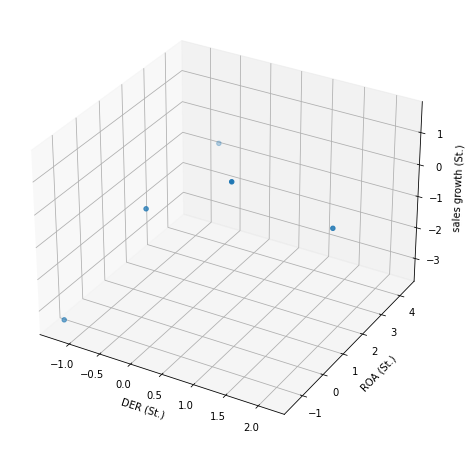

In [39]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
x = [2.14769078, 1.08624921,-0.31833564,-0.71820146,-1.23712845]
y = [1.13730457,-0.35671713,-0.17963109,4.3626382,-1.43812585]
z = [ -0.05403679,1.58648632,-0.10067568,-0.73962853,-3.38405384]

ax.set_xlabel("DER (St.)")
ax.set_ylabel("ROA (St.)")
ax.set_zlabel("sales growth (St.)")
ax.scatter(x, y, z)
plt.show()

***
# 6. deskripsi Cluster
***

# 6.1 Cluster yang Terdampak Sangat Positif

In [40]:
#Highly Positively Impacted
df[df['category'] == 4].describe() 

,category,sales growth (St.),DER (St.),ROA (St.),sales growth,DER,ROA
count,4.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,4.0,1.086249,-0.356717,1.586486,0.765000,0.717500,0.187500
std,0.0,1.211110,0.140734,0.913102,0.513452,0.465573,0.093229
min,4.0,-0.317212,-0.479896,0.827438,0.170000,0.310000,0.110000
25%,4.0,0.585013,-0.434554,0.900895,0.552500,0.460000,0.117500
50%,4.0,1.015486,-0.395258,1.366118,0.735000,0.590000,0.165000
75%,4.0,1.516723,-0.317421,2.051709,0.947500,0.847500,0.235000
max,4.0,2.631236,-0.156456,2.786272,1.420000,1.380000,0.310000


In [41]:
display(df[df['category'] == 4])

,emiten,stock name,category,sales growth (St.),DER (St.),ROA (St.),sales growth,DER,ROA
4,ARNA,Arwana Citramulia Tbk,4,-0.317212,-0.419440,1.806855,0.17,0.51,0.21
6,CCSI,Communication Cable Systems Indonesia Tbk,4,1.145218,-0.479896,0.827438,0.79,0.31,0.11
8,HEXA,Hexindo Adiperkasa Tbk,4,0.885755,-0.156456,0.925380,0.68,1.38,0.12
20,MARK,PT Mark Dynamics Indonesia Tbk.,4,2.631236,-0.371075,2.786272,1.42,0.67,0.31


# 6.2 Cluster yang Terdampak Positif

In [42]:
#Positively Impacted
df[df['category'] == 2].describe()

,category,sales growth (St.),DER (St.),ROA (St.),sales growth,DER,ROA
count,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,2.0,2.147691,1.137305,-0.054037,1.215000,5.660000,0.020000
std,0.0,0.750553,1.226894,0.554042,0.318198,4.058793,0.056569
min,2.0,1.616970,0.269759,-0.445804,0.990000,2.790000,-0.020000
25%,2.0,1.882330,0.703532,-0.249920,1.102500,4.225000,0.000000
50%,2.0,2.147691,1.137305,-0.054037,1.215000,5.660000,0.020000
75%,2.0,2.413051,1.571077,0.141847,1.327500,7.095000,0.040000
max,2.0,2.678412,2.004850,0.337730,1.440000,8.530000,0.060000


In [43]:
display(df[df['category'] == 2])

,emiten,stock name,category,sales growth (St.),DER (St.),ROA (St.),sales growth,DER,ROA
16,KOBX,Kobexindo Tractors Tbk,2,2.678412,0.269759,0.337730,1.44,2.79,0.06
17,KOIN,Kokoh Inti Arebama Tbk,2,1.616970,2.004850,-0.445804,0.99,8.53,-0.02


# 6.3 Cluster yang Tidak Terdampak / Netral

In [44]:
#Neutral Impacted
df[df['category'] == 1].describe()

,category,sales growth (St.),DER (St.),ROA (St.),sales growth,DER,ROA
count,21.0,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,1.0,-0.318336,-0.179631,-0.100676,0.169524,1.303333,0.015238
std,0.0,0.543922,0.357839,0.441954,0.230597,1.183796,0.045124
min,1.0,-1.378654,-0.549421,-0.837570,-0.280000,0.080000,-0.060000
25%,1.0,-0.647439,-0.410372,-0.445804,0.030000,0.540000,-0.020000
50%,1.0,-0.317212,-0.307597,-0.054037,0.170000,0.880000,0.020000
75%,1.0,-0.010574,-0.065772,0.239788,0.300000,1.680000,0.050000
max,1.0,0.862167,0.662724,0.631555,0.670000,4.090000,0.090000


In [45]:
display(df[df['category'] == 1])

,emiten,stock name,category,sales growth (St.),DER (St.),ROA (St.),sales growth,DER,ROA
0,AMFG,Asahimas Flat Glass Tbk,1,0.060189,-0.174593,0.337730,0.33,1.32,0.06
1,AMIN,PT Ateliers Mecaniques D Indonesie Tbk.,1,0.248890,-0.229004,-0.739629,0.41,1.14,-0.05
2,APII,PT Arita Prima Indonesia Tbk.,1,-0.647439,-0.425486,0.239788,0.03,0.49,0.05
3,ARKA,PT Arkha Jayanti Persada Tbk.,1,-0.199274,0.626450,-0.445804,0.22,3.97,-0.02
5,CAKK,Cahayaputra Asa Keramik Tbk,1,-0.010574,-0.307597,0.043905,0.30,0.88,0.03
7,CTTH,Citatah Tbk,1,-1.119190,0.115596,-0.739629,-0.17,2.28,-0.05
9,IKBI,Sumi Indo Kabel Tbk,1,0.862167,-0.371075,-0.151978,0.67,0.67,0.01
10,IMPC,Impack Pratama Industri Tbk,1,-0.057749,-0.355961,0.533613,0.28,0.72,0.08
12,JECC,Jembo Cable Company Tbk,1,-0.340800,-0.096000,-0.641687,0.16,1.58,-0.04
13,KBLI,KMI Wire & Cable Tbk,1,-1.119190,-0.525239,-0.054037,-0.17,0.16,0.02


# 6.4 Cluster yang Terdampak Negatif

In [46]:
#Negatively Impacted
df[df['category'] == 0].describe()

,category,sales growth (St.),DER (St.),ROA (St.),sales growth,DER,ROA
count,1.0,1.000000,1.000000,1.000000,1.0,1.00,1.00
mean,0.0,-0.718201,4.362638,-0.739629,0.0,16.33,-0.05
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0,-0.718201,4.362638,-0.739629,0.0,16.33,-0.05
25%,0.0,-0.718201,4.362638,-0.739629,0.0,16.33,-0.05
50%,0.0,-0.718201,4.362638,-0.739629,0.0,16.33,-0.05
75%,0.0,-0.718201,4.362638,-0.739629,0.0,16.33,-0.05
max,0.0,-0.718201,4.362638,-0.739629,0.0,16.33,-0.05


In [47]:
display(df[df['category'] == 0])

,emiten,stock name,category,sales growth (St.),DER (St.),ROA (St.),sales growth,DER,ROA
19,KRAH,PT Grand Kartech Tbk,0,-0.718201,4.362638,-0.739629,0.0,16.33,-0.05


# Cluster yang Terdampak Sangat Negatif

In [48]:
#Highly Negatively Impacted
df[df['category'] == 3].describe()


,category,sales growth (St.),DER (St.),ROA (St.),sales growth,DER,ROA
count,1.0,1.000000,1.000000,1.000000,1.00,1.00,1.00
mean,3.0,-1.237128,-1.438126,-3.384054,-0.22,-2.86,-0.32
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.0,-1.237128,-1.438126,-3.384054,-0.22,-2.86,-0.32
25%,3.0,-1.237128,-1.438126,-3.384054,-0.22,-2.86,-0.32
50%,3.0,-1.237128,-1.438126,-3.384054,-0.22,-2.86,-0.32
75%,3.0,-1.237128,-1.438126,-3.384054,-0.22,-2.86,-0.32
max,3.0,-1.237128,-1.438126,-3.384054,-0.22,-2.86,-0.32


In [49]:
display(df[df['category'] == 3])

,emiten,stock name,category,sales growth (St.),DER (St.),ROA (St.),sales growth,DER,ROA
11,INTA,Intraco Penta Tbk,3,-1.237128,-1.438126,-3.384054,-0.22,-2.86,-0.32
